In [9]:
# -*- coding: utf-8 -*-

### Imports ###
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import plotly.graph_objects as go

matplotlib.rcParams["figure.dpi"] = 300  # highres display
from IPython.display import clear_output
from time import sleep

In [10]:
#@title Helper Functions
### Helper Functions ###
def HammingDistance(x, y):
    "gives Hamming distance b/w #x and #y"
    count = 0
    if len(x) == len(y):
        for _ in range(len(x)):
            if x[_] != y[_]:
                count += 1
    else:
        raise ValueError("Incorrect dimensions of input vectors")
    return count / len(x)


def SyncUpdate(W, x, bias= 0):
    "returns the synchronously updated neuron values #x using #W"
    ### choose preferred #activation function {tanh, sign, sigmoid}
    return np.sign(-1*np.dot(W, x) - bias )


def AsyncUpdate(W, x, bias= 0, updates=1):
    "returns the asynchronously updated neuron values #x using #W"
    for _ in np.random.randint(low=0, high=len(x), size=updates):
        x[_] = Step(-1*np.dot(W[_, :], x) - bias[_])
    return x


def ProbUpdate(W, x, bias, beta=1000, updates=10):
    "returns the Metropolis updated neuron values #x using #W. #beta is the temperature parameter"
    for _ in np.random.randint(0, len(x), size=updates):
        h_ = (np.dot(W[_, :], x)- bias[_])/len(x)
        x[_] = np.random.choice([+1, 0], p=[Sigmoid(beta*h_), Sigmoid(-beta*h_)])
    return x


def Energy(W, x, bias):
    "return the energy of a particular configuration #x of neuron values"
    return -0.5 * (1 / len(x)) * ( np.dot(x, np.dot(W, x)) - np.dot(bias,x))

def Step(x):
    if x>0: return 1
    if x<=0: return 0
    
def Sigmoid(x):
    "return the sigmoid of x#"
    return 1 / (1 + np.exp(-x))

In [20]:
#@title Update Run
def Run(steps, x0, W, bias, update_rule= 'AsyncUpdate', skip_steps = 10):
    """ function to update the configuration of network
        steps: no. of steps of iteration
        x0: input initial configuration of network
        W: input adjacency matrix
        update_rule: specify update rule
        skip steps: no. steps skipped while visualization"""
    E = [] ## list to store energy
    Match = np.zeros((len(x0),len(x0)))## current activation of adjacency matrix
    for _ in range(steps):
        if update_rule== 'SyncUpdate' : x0 = SyncUpdate(W, x0, bias)
        elif update_rule== 'AsyncUpdate' : x0 = AsyncUpdate(W, x0, bias, updates= 1)
        elif update_rule== 'ProbUpdate' : x0 = ProbUpdate(W, x0, bias, updates=1)
        Match = np.outer(x0,x0)
       # E.append(Energy(W, x0, bias))

        ## visualization sub-routine ~ 
        if (_%skip_steps == 0):
            clear_output(wait= True)
            plt.figure(figsize= (12,12))
            plt.subplot(221)
            plt.title("Current Matching: ")
            sns.heatmap(Match, linewidths= 0.2)
            #plt.subplot(222)
            #plt.title('Energy')
            #plt.plot(np.linspace(0,len(E),len(E)),E)
            plt.xlabel('Iterations ->')
            plt.show()
            sleep(0.01)

    return 'xD'


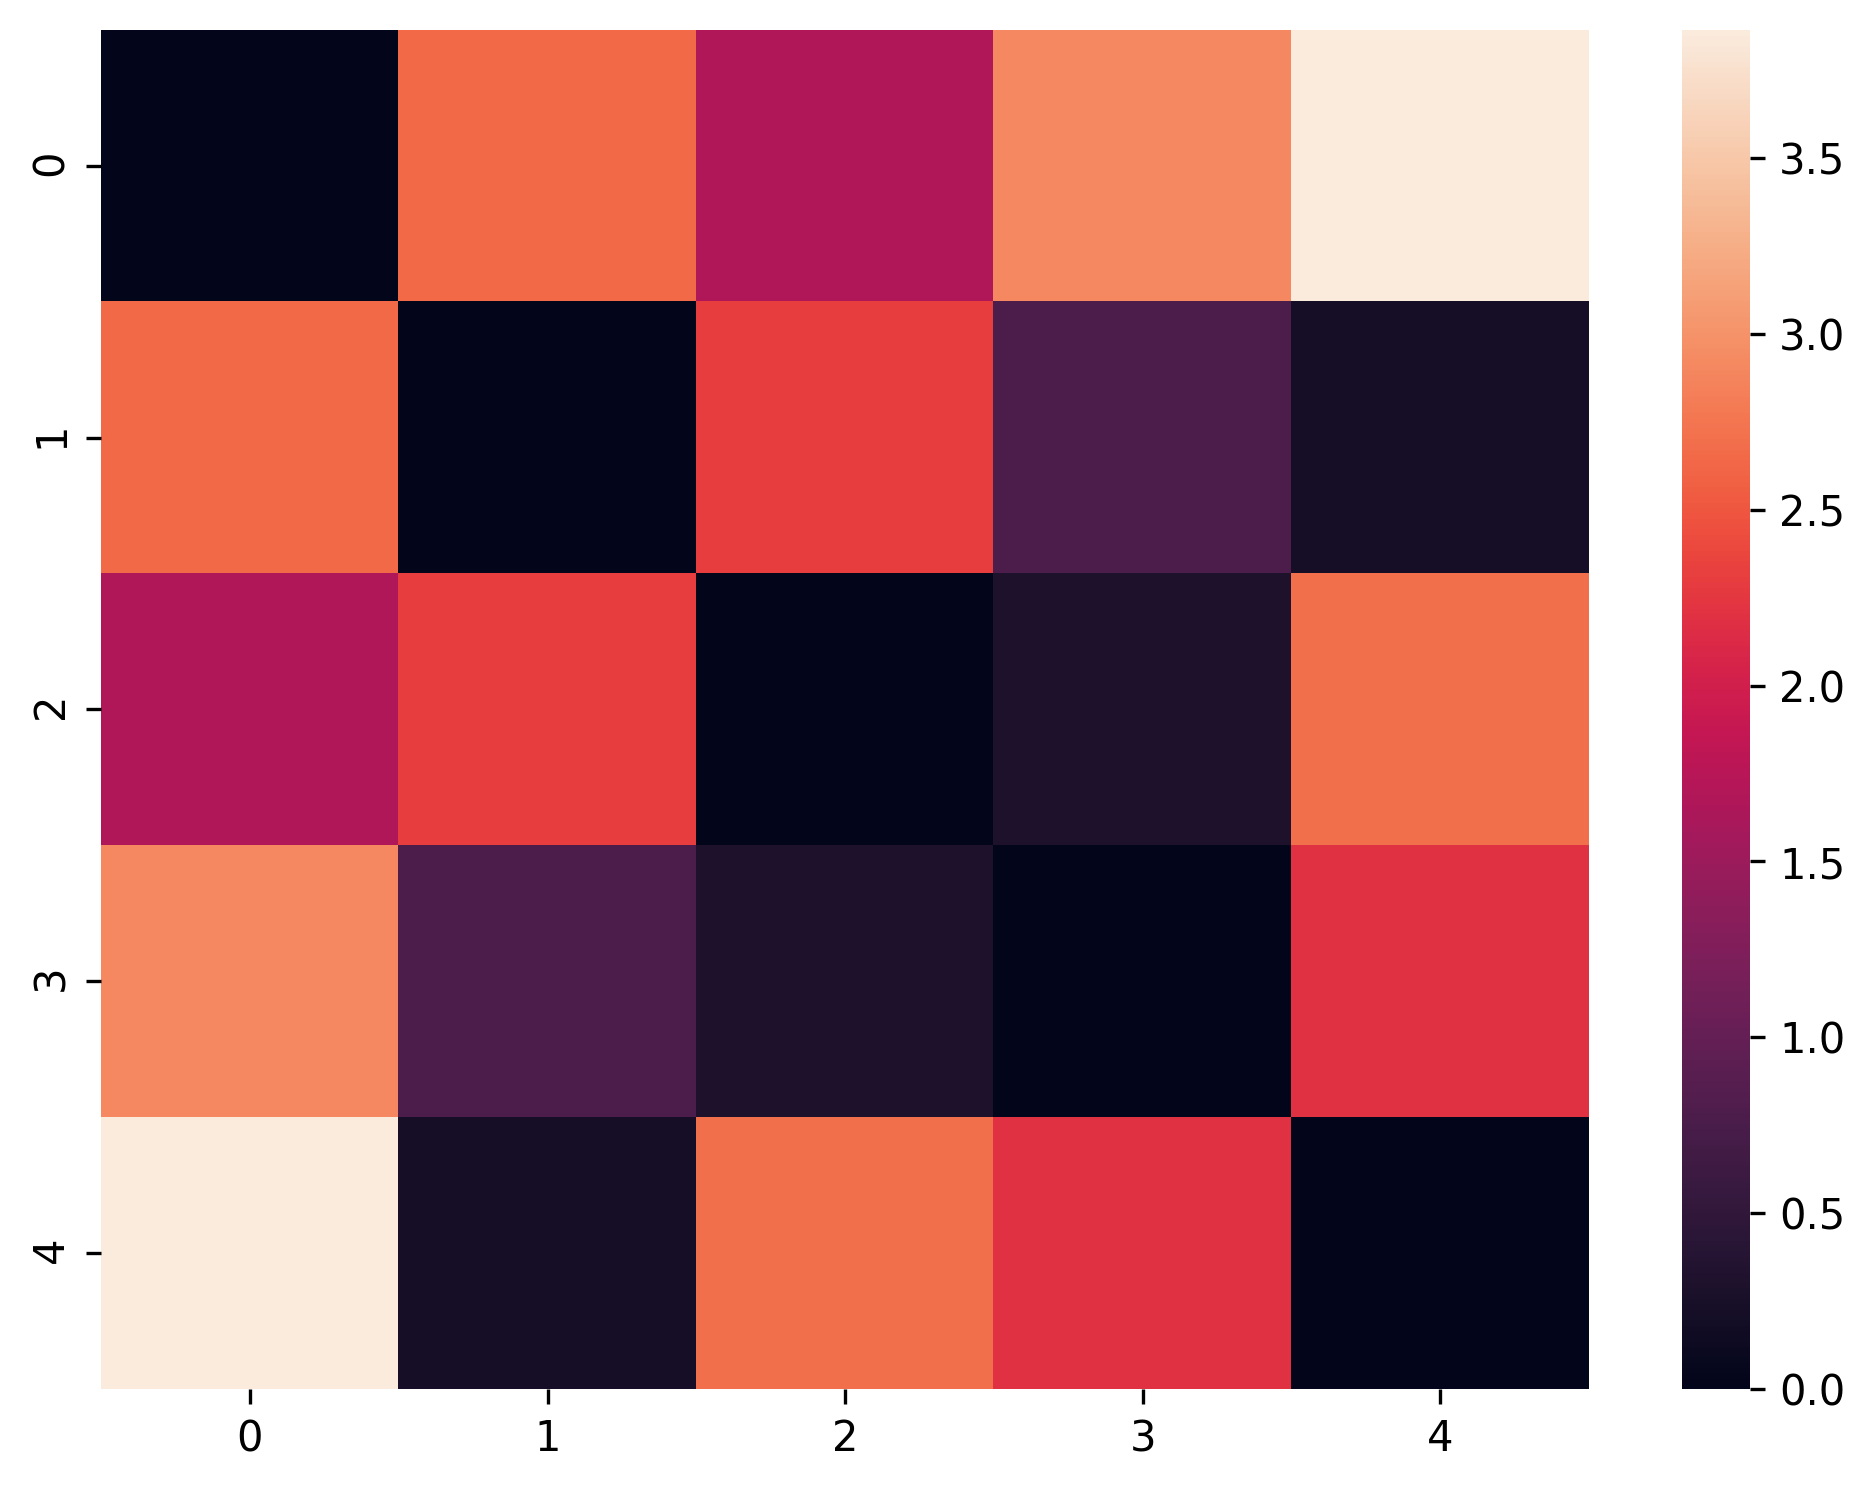

In [21]:
### Initializations ###

## no. of nodes n in graph
n= 5
## dim. of adjacency matrix
N = n*n

## construct adjacency matrix W
W = np.zeros((n,n))
for node_i in range(n):
  for node_j in range(n):
    if node_i != node_j:  W[node_i,node_j] = W[node_j,node_i] = np.random.uniform(low=0.0, high=5.0)
plt.figure(figsize=(8,6))    
sns.heatmap(W)

## random initial config
x0 = np.random.choice([-1,1], size = n)
bias  = np.zeros(n)

In [19]:
x0

array([-1,  1,  1,  1,  1])

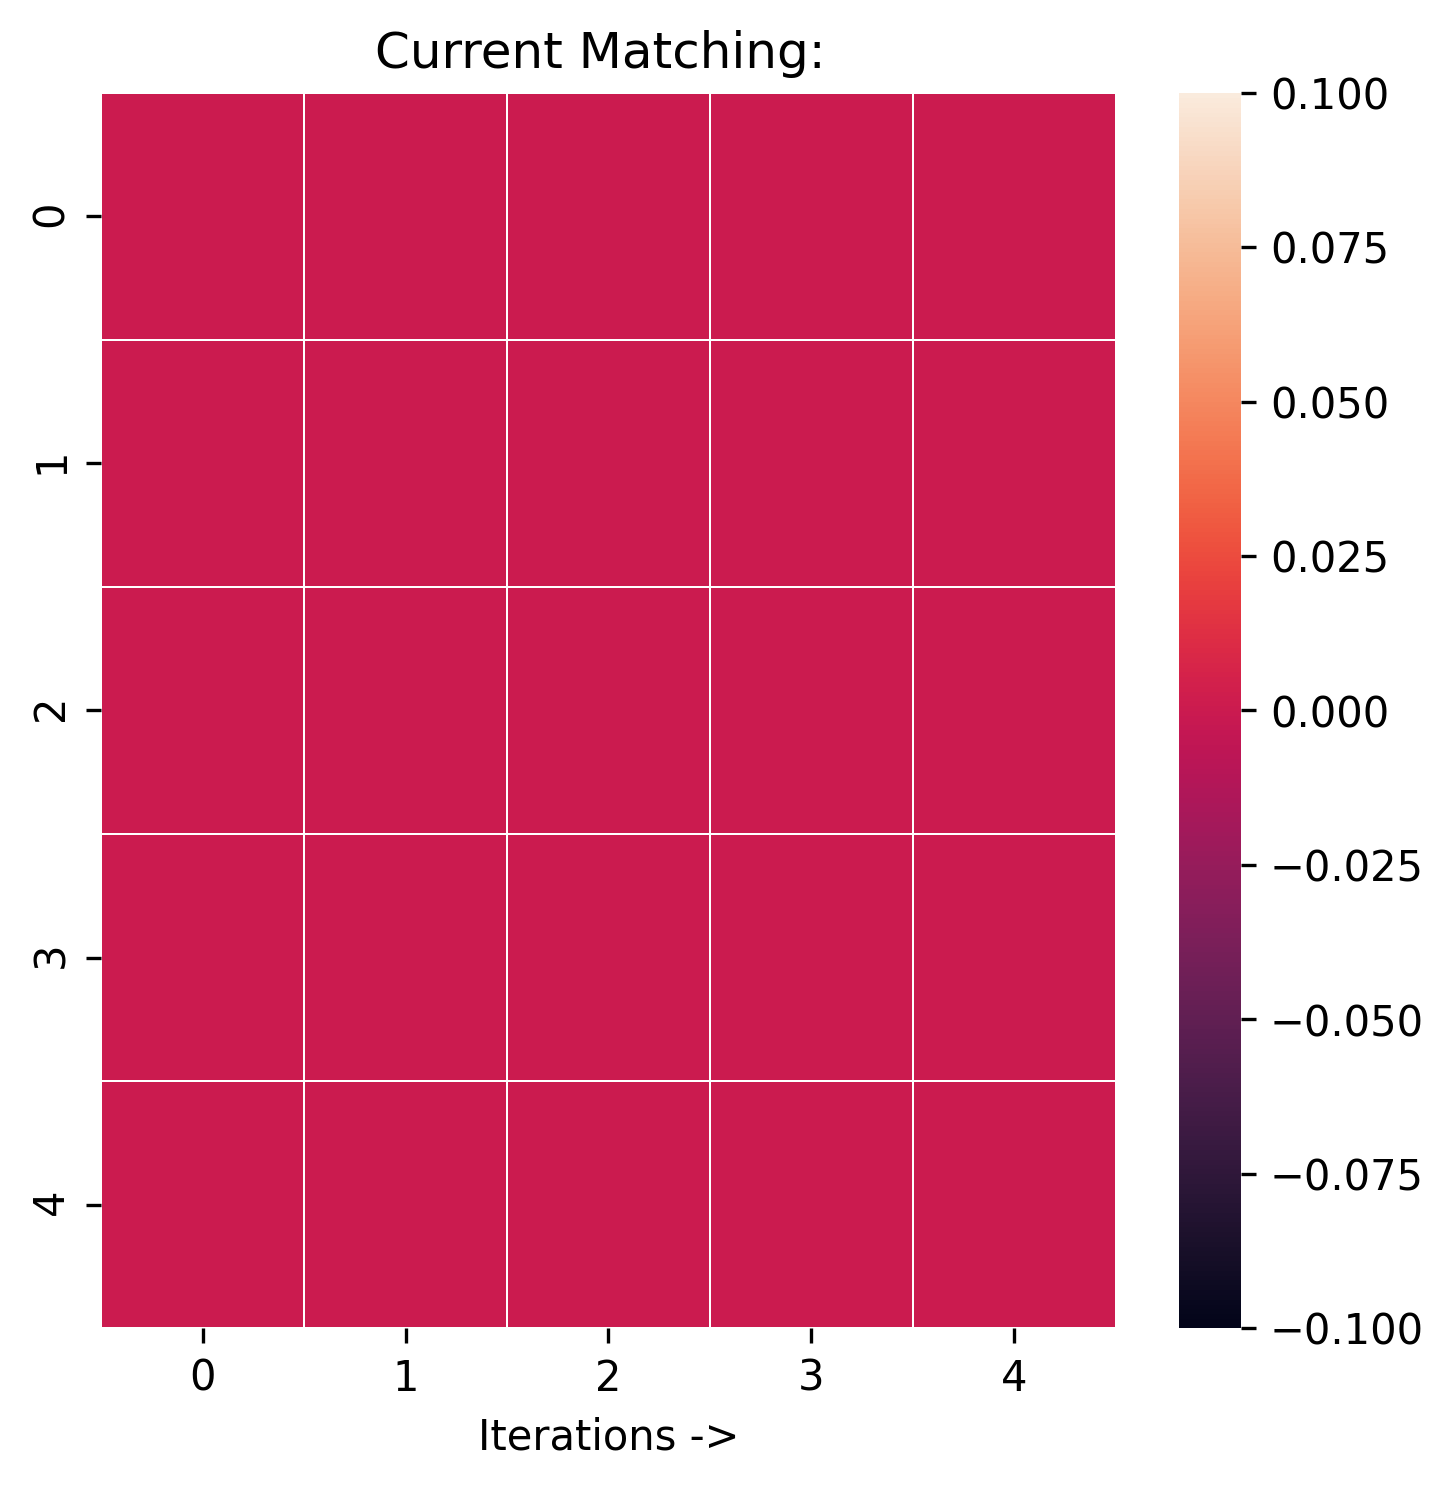

'xD'

In [24]:
Run(100, np.random.choice([-1,1], size = n), W,bias, update_rule='AsyncUpdate', skip_steps= 5)
